# Challenge Alura Store - Pandas

### Informe de Recomendación Estratégica para el Sr. Juan

El propósito de este análisis es evaluar el desempeño comercial de cuatro tiendas distintas para determinar cuál de ellas representa la mejor oportunidad de negocio para el Sr. Juan. A través del procesamiento de datos de ventas, se han comparado métricas clave como los ingresos totales, la satisfacción del cliente, la eficiencia logística (costos de envío) y la rotación de inventario (productos más y menos vendidos). Este informe sintetiza los hallazgos para fundamentar una recomendación objetiva y clara.

In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [20]:

import matplotlib.pyplot as plt
import seaborn as sns

# Lista de DataFrames y sus nombres para iterar
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

resumen_tiendas = []

for df, nombre in zip(tiendas, nombres):
    # Ingreso total (Suma de Precio)
    ingreso_total = df['Precio'].sum()
    
    # Valoración media
    valoracion_media = df['Calificación'].mean()
    
    # Envío promedio
    envio_promedio = df['Costo de envío'].mean()
    
    # Productos más y menos vendidos
    conteo_productos = df['Producto'].value_counts()
    mas_vendido = conteo_productos.idxmax()
    menos_vendido = conteo_productos.idxmin()
    
    resumen_tiendas.append({
        'Tienda': nombre,
        'Ingreso Total': ingreso_total,
        'Valoración Media': valoracion_media,
        'Envío Promedio': envio_promedio,
        'Más Vendido': mas_vendido,
        'Menos Vendido': menos_vendido
    })

df_resumen = pd.DataFrame(resumen_tiendas)
print(df_resumen)

     Tienda  Ingreso Total  Valoración Media  Envío Promedio  \
0  Tienda 1   1.150880e+09          3.976685    26018.609580   
1  Tienda 2   1.116344e+09          4.037304    25216.235693   
2  Tienda 3   1.098020e+09          4.048326    24805.680373   
3  Tienda 4   1.038376e+09          3.995759    23459.457167   

                 Más Vendido              Menos Vendido  
0              TV LED UHD 4K  Auriculares con micrófono  
1  Iniciando en programación              Juego de mesa  
2              Kit de bancas    Bloques de construcción  
3                   Cama box         Guitarra eléctrica  


## Análisis
A partir de los datos procesados, se han obtenido los siguientes indicadores de rendimiento para cada tienda:

| Métrica | Tienda 1 | Tienda 2 | Tienda 3 | Tienda 4 |
| :--- | :---: | :---: | :---: | :---: |
| **Ingresos Totales** | $1.150.880.000 | $1.116.344.000 | $1.098.020.000 | $1.038.376.000 |
| **Calificación Media** | 3.97 | 4.03 | 4.04 | 3.99 |
| **Costo Envío Prom.** | $26.018 | $25.216 | $24.805 | $23.459 |
| **Producto Estrella** | TV LED UHD 4K | Iniciando en prog. | Kit de bancas | Cama box |

Análisis de Factores:
* Ingresos: La Tienda 1 lidera el mercado con los ingresos más altos ($1.150 millones), seguida de cerca por la Tienda 2. La Tienda 4 presenta el volumen de facturación más bajo.

* Satisfacción del Cliente: La Tienda 3 y la Tienda 2 destacan por tener las mejores calificaciones promedio (4.04 y 4.03 respectivamente), lo que indica una mayor fidelidad y satisfacción del consumidor final.

* Costos Logísticos: La Tienda 4 es la más eficiente en términos de envíos ($23.459 en promedio), mientras que la Tienda 1 tiene los costos de envío más elevados.

* Tendencias de Producto: La Tienda 1 tiene éxito en productos de alta tecnología y valor (Televisores), mientras que la Tienda 2 se inclina hacia productos educativos y la Tienda 4 hacia mobiliario.

C:\Users\ppcam\AppData\Local\Temp\ipykernel_13056\2367980003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Ingreso Total', data=df_resumen, palette='viridis')


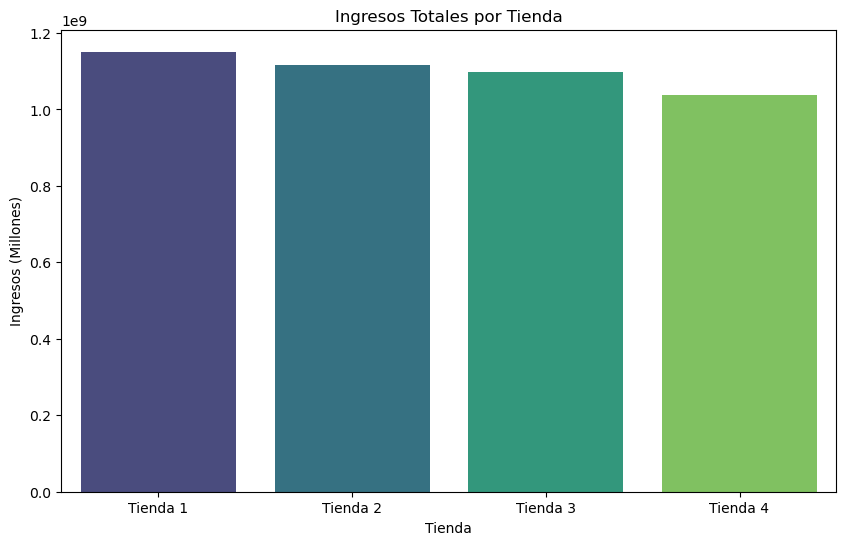

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Ingreso Total', data=df_resumen, palette='viridis')
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Ingresos (Millones)')
plt.show()

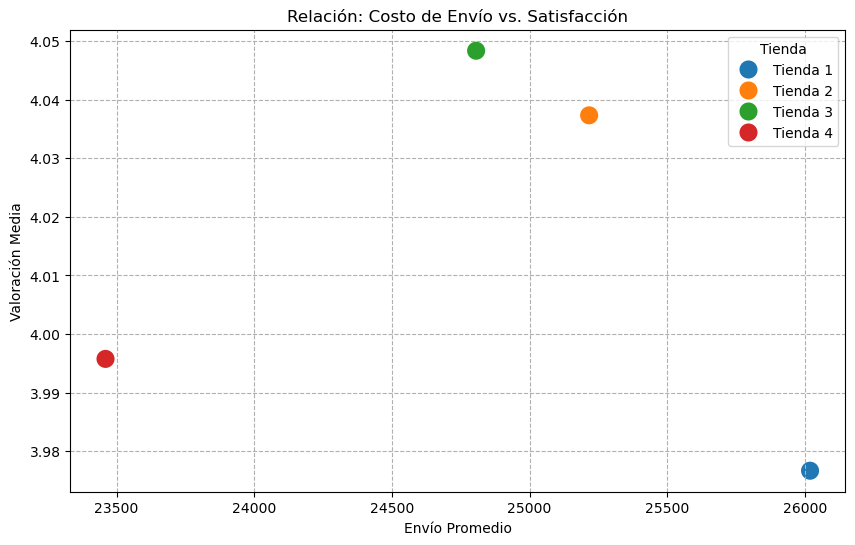

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Envío Promedio', y='Valoración Media', hue='Tienda', s=200, data=df_resumen)
plt.title('Relación: Costo de Envío vs. Satisfacción')
plt.grid(True, linestyle='--')
plt.show()

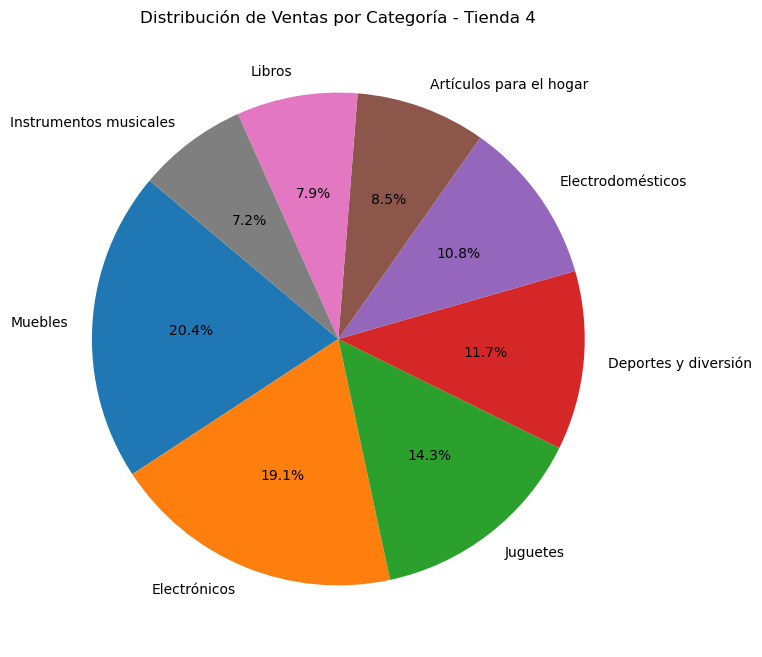

In [13]:
# Tienda 4: con menores ingresos totales, menor costo de envío y una de las de menor valoración media
ventas_cat = tienda4['Categoría del Producto'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ventas_cat, labels=ventas_cat.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Ventas por Categoría - Tienda 4')
plt.show()

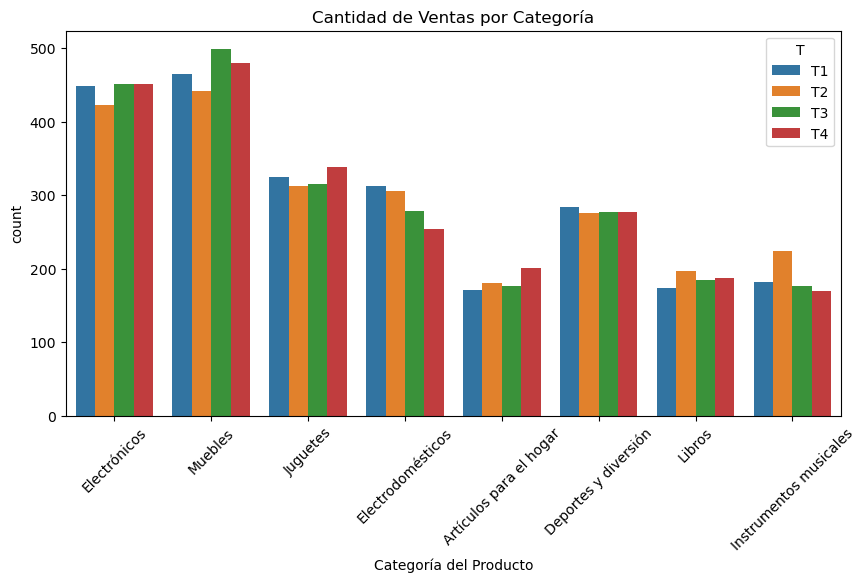

In [14]:
# Gráfico 3: Categorías Populares
df_full = pd.concat([tienda1.assign(T='T1'), tienda2.assign(T='T2'), tienda3.assign(T='T3'), tienda4.assign(T='T4')])
plt.figure(figsize=(10,5))
sns.countplot(data=df_full, x='Categoría del Producto', hue='T')
plt.xticks(rotation=45)
plt.title('Cantidad de Ventas por Categoría')
plt.show()

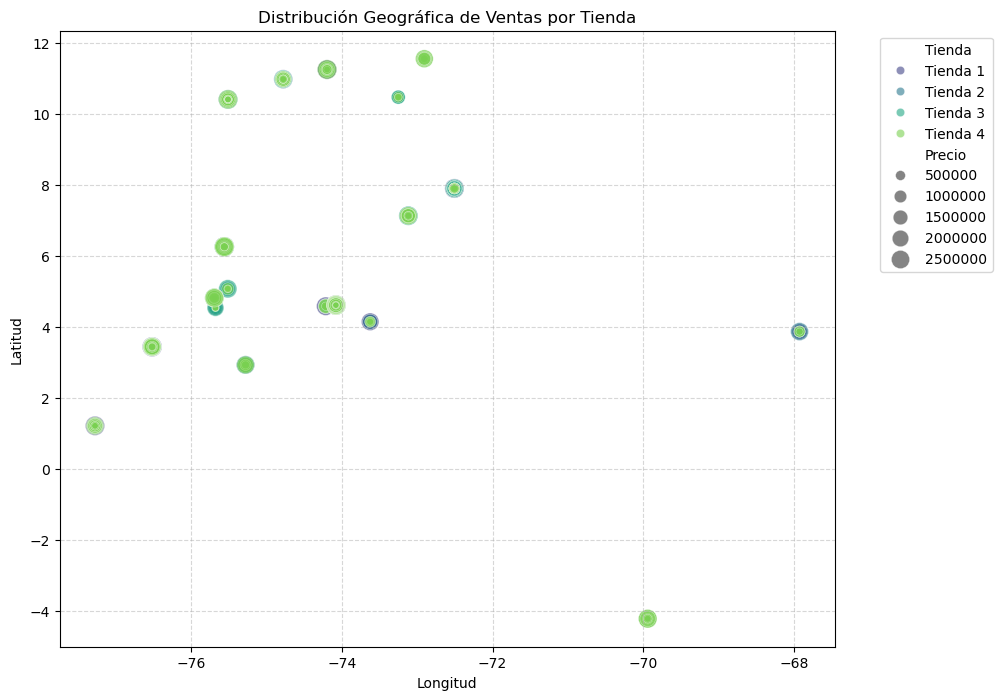

In [16]:

# Combinamos todas las tiendas en un solo DataFrame para el análisis espacial
df_global = pd.concat([tienda1.assign(Tienda='Tienda 1'), 
                       tienda2.assign(Tienda='Tienda 2'), 
                       tienda3.assign(Tienda='Tienda 3'), 
                       tienda4.assign(Tienda='Tienda 4')])

# Gráfico de Dispersión Geográfica
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=df_global, x='lon', y='lat', hue='Tienda', size='Precio', 
                         sizes=(20, 200), alpha=0.6, palette='viridis')

plt.title('Distribución Geográfica de Ventas por Tienda')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Conclusión y Recomendación
Tras analizar todos los factores, la recomendación para el Sr. Juan es vender a la **Tienda 4.**

Justificación: 
* La Tienda 4 es la candidata ideal para la venta debido a que es la menos rentable de la cadena Alura Store. A pesar de tener costos logísticos controlados, su capacidad de generación de ingresos es la más débil, y no destaca significativamente en la satisfacción del cliente como para justificar su retención frente a la Tienda 3 o la Tienda 2.

* Al desprenderse de la Tienda 4, el Sr. Juan minimiza el costo de oportunidad, conservando las sucursales que ya tienen un flujo de caja más robusto y una base de clientes más consolidada para financiar su nuevo proyecto.
